In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, atpe
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [2]:
cluster = pd.read_csv("train.csv")
validation= pd.read_csv("validation.csv")

In [3]:
cluster['target'] = np.where(cluster['price']>645000, 1, 0)
validation['target'] = np.where(validation['price']>645000, 1, 0)

In [4]:
precluster = cluster [['target','floors','yr_built','yr_renovated','view','bedrooms','bathrooms',"sqft_living", "sqft_lot", "sqft_living15" , "sqft_lot15",  "sqft_above" ,"sqft_basement",'Cluster_final','condition','grade']]
prevalidation = validation [['target','floors','yr_built','yr_renovated','view','bedrooms','bathrooms',"sqft_living", "sqft_lot", "sqft_living15" , "sqft_lot15",  "sqft_above" ,"sqft_basement",'Cluster_final','condition','grade']]

In [5]:
d_precluster=pd.get_dummies(precluster,       columns=['Cluster_final','condition','grade'])
d_prevalidation=pd.get_dummies(prevalidation, columns=['Cluster_final','condition','grade'])

In [6]:
X_train = d_precluster.drop('target', axis=1)
y_train = d_precluster['target']
X_test= d_prevalidation.drop('target', axis=1)
y_test= d_prevalidation['target']

### RANDOM FOREST para medir la importancia de las Variables dentro del modelo  General Binario

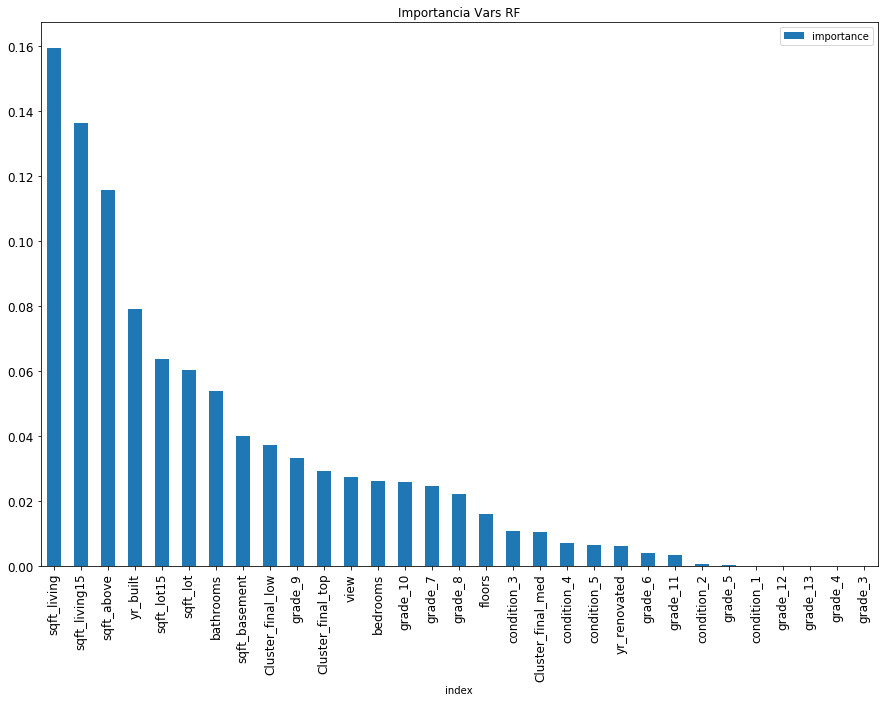

In [7]:
#build model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
paracolumnas = X_train.columns
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = paracolumnas,
                                   columns=['importance']).sort_values('importance', ascending=False)

#feature_importances.reset_index(inplace=True)
dfpinta = feature_importances.head(45)
dfpinta.reset_index(drop=False, inplace=True)
dfpinta
dfpinta.plot('index', 'importance', kind='bar', title ="Importancia Vars RF", figsize=(15, 10), legend=True, fontsize=12)

### Ahora lo vamos a Lanzar para explicar la importancia dentro del Análisis Cluster

In [3]:
cluster = pd.read_csv("train.csv")
validation= pd.read_csv("validation.csv")

In [4]:
precluster = cluster [['Cluster_final','price','floors','yr_built','yr_renovated','view','bedrooms','bathrooms',"sqft_living", "sqft_lot", "sqft_living15" , "sqft_lot15",  "sqft_above" ,"sqft_basement",'condition','grade']]
prevalidation = validation [['Cluster_final','price','floors','yr_built','yr_renovated','view','bedrooms','bathrooms',"sqft_living", "sqft_lot", "sqft_living15" , "sqft_lot15",  "sqft_above" ,"sqft_basement",'condition','grade']]

In [5]:
d_precluster=pd.get_dummies(precluster,       columns=['condition','grade'])
d_prevalidation=pd.get_dummies(prevalidation, columns=['condition','grade'])

In [6]:
X_train = d_precluster.drop('Cluster_final', axis=1)
y_train = d_precluster['Cluster_final']
X_test= d_prevalidation.drop('Cluster_final', axis=1)
y_test= d_prevalidation['Cluster_final']

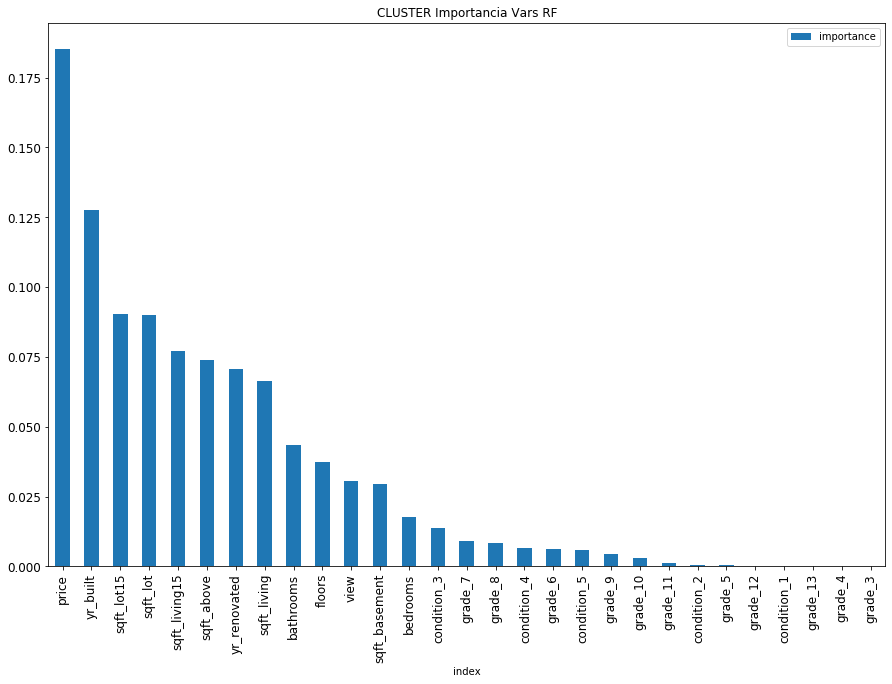

In [7]:
#build model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
paracolumnas = X_train.columns
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = paracolumnas,
                                   columns=['importance']).sort_values('importance', ascending=False)

#feature_importances.reset_index(inplace=True)
dfpinta = feature_importances.head(45)
dfpinta.reset_index(drop=False, inplace=True)
dfpinta
dfpinta.plot('index', 'importance', kind='bar', title ="CLUSTER Importancia Vars RF", figsize=(15, 10), legend=True, fontsize=12)